In [66]:
# Following the Gillespie algorthim:
# 1. Initialization of states & parameters
# 2. Monte-carlo step. Random process/step selection.
# 3. Update all states. e.g., I = I + 1 (increase of infected by 1 person). Note: only +/- by 1.
# 4. Repeat until stopTime.

# Params is [β, ɣ] 
# sirInfo is [S, I, R] 
# endTime is Float64

using DataFrames, Distributions, Random, Plots

function stochSIR(params, sirInfo, endTime)

    β = params[1] # Infection rate
    ɣ = params[2] # Recovery  rate
          
    # Data storage for while-loop process
    X = (S = [sirInfo[1]], I = [sirInfo[2]], R = [sirInfo[3]], time = [0.0])
    
    while X.time[end] < endTime
        
        # Probability of each process (infection, recovery)
        W1 = β * X.S[end] * X.I[end]
        W2 = ɣ * X.I[end]
        WTOT = W1 + W2 # Total reaction rate
        
        # Random time step creation
        k = rand(Exponential(1/WTOT))
        push!(X.time, X.time[end] + k) # Keep track of the time steps
         
        # Generate random number for use in upcoming if-statement
        randNum = rand()
        
        # Randomly pick a process and update the states (steps 2 & 3)
        # Also keep track of the updated states
        if randNum < (W1/WTOT)
            push!(X.S, X.S[end] - 1)
            push!(X.I, X.I[end] + 1)
            
            push!(X.R, X.R[end])            
        else
            push!(X.I, X.I[end] - 1)
            push!(X.R, X.R[end] + 1)
            
            push!(X.S, X.S[end])
           
        end
        # Repeat until Infection = 0 or maximum time steps reached
    end
    
    # Put the SIR data into a DataFrame b/c the formatting is really nice
    sirData = DataFrame()
    sirData.Susceptible = X.S
    sirData.Infected    = X.I
    sirData.Recovered   = X.R
    sirData.time        = X.time
    
    return(sirData)
end


stochSIR (generic function with 1 method)

In [67]:
# Generate seed for reproducibility of results
 Random.seed!(42);

In [68]:
# Params is [β, ɣ] -> β = 0.001, ɣ = 0.05
# S = 299, I = 1, R = 0
# endTime = 100

# Remove ';' to view raw data. Nicely formated due to being a DataFrame!
out = stochSIR([0.001, 0.05], [299, 1, 0.0], 100.0);


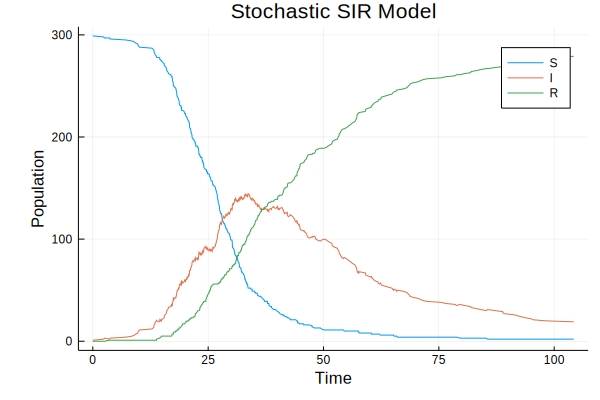

In [69]:
# Plot from the 'out' DataFrame
# Regular plot size (too small really)

plot(out.time, [out.Susceptible, out.Infected, out.Recovered], 
    title = "Stochastic SIR Model",
    label  = ["S" "I" "R"],
    xlabel = "Time", 
    ylabel = "Population")

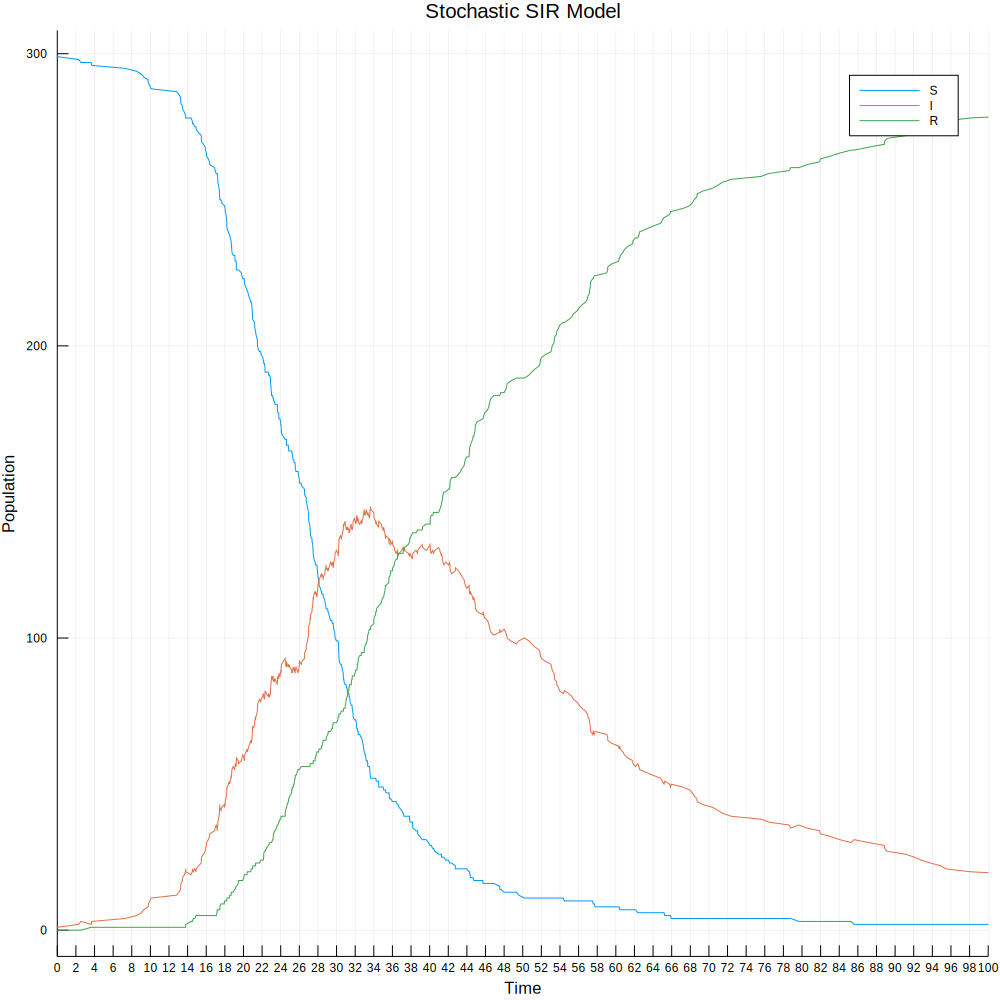

In [70]:
# Enlarged plot
plot(out.time,  [out.Susceptible, out.Infected, out.Recovered], 
    title = "Stochastic SIR Model",
    label  = ["S" "I" "R"],
    size   = (1000,1000),
    xlabel = "Time", 
    ylabel = "Population",
    xlims  = (0, 100),
    xticks = 0:2.0:100)

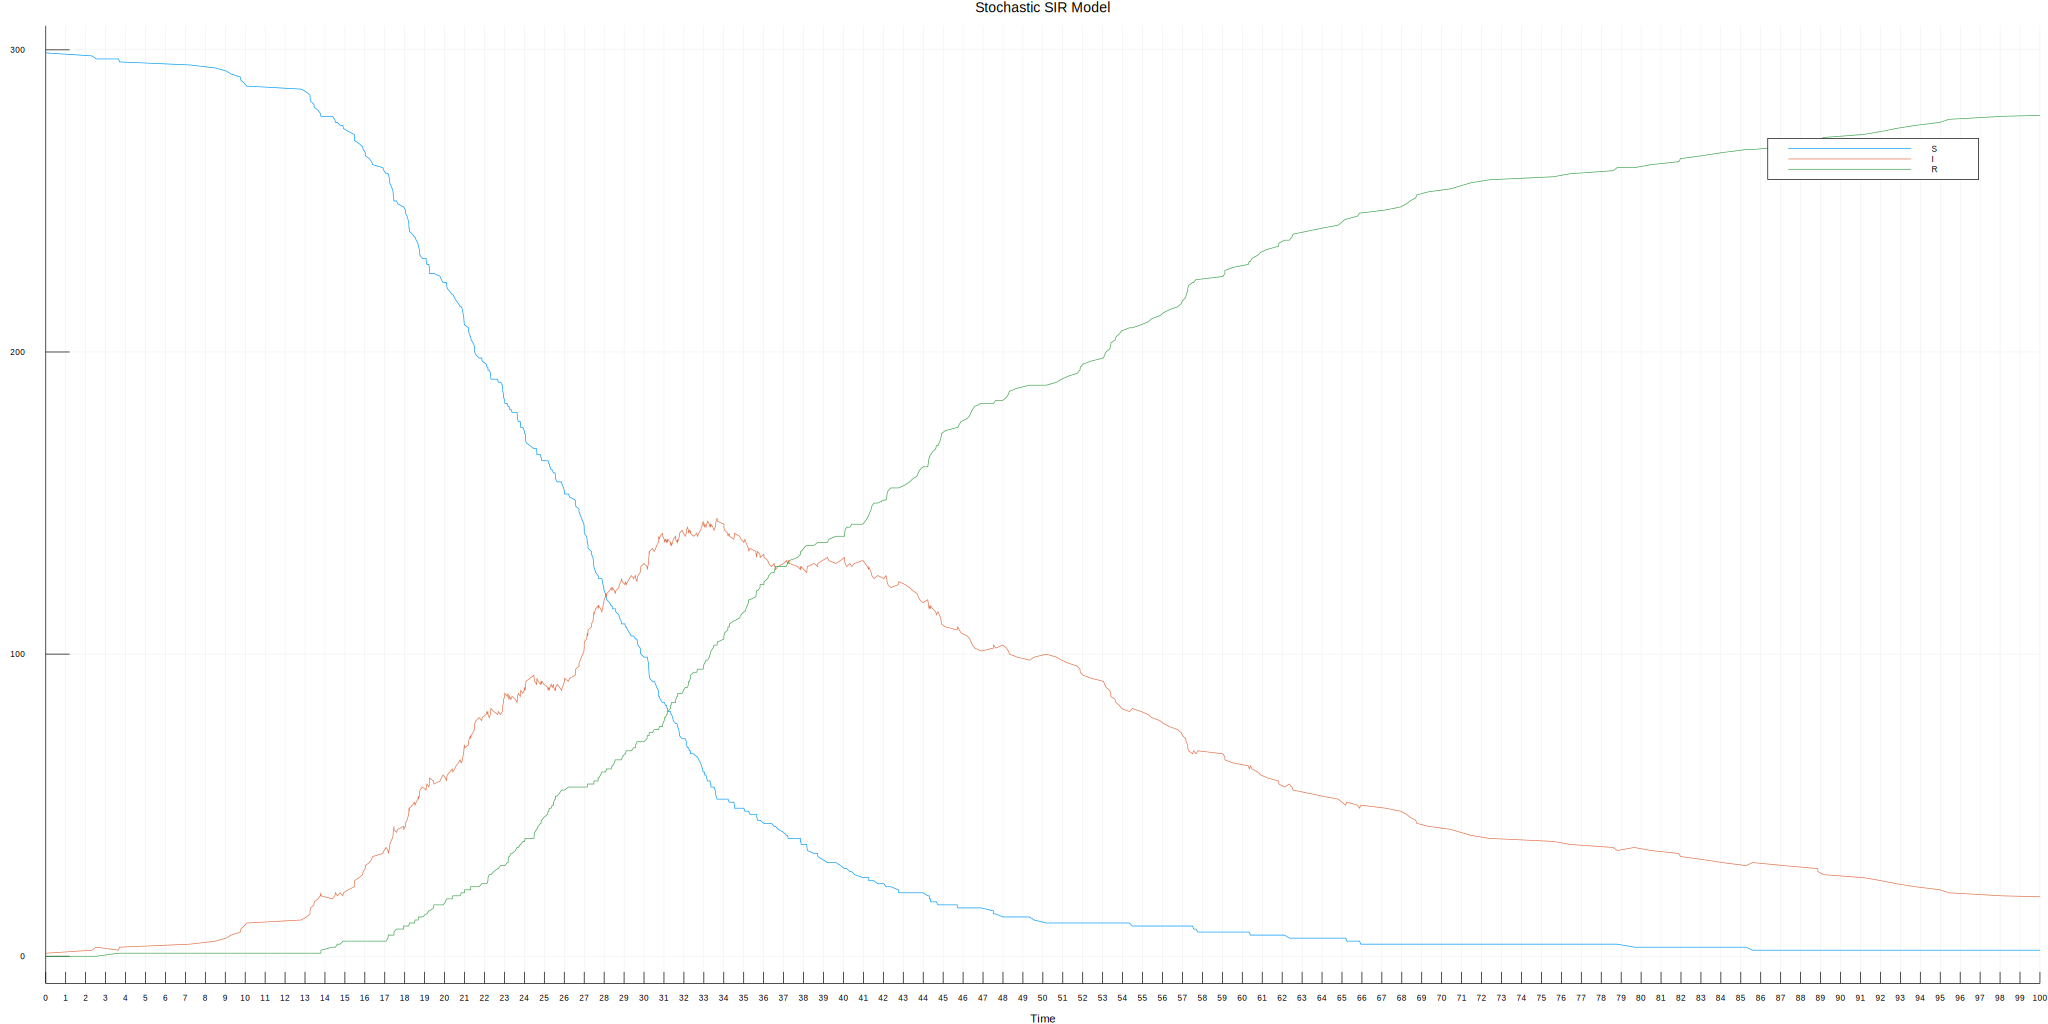

In [71]:
# Very big plot. Make sure to scroll to the right to see close up of the curves. 
plot(out.time,  [out.Susceptible, out.Infected, out.Recovered], 
    title = "Stochastic SIR Model",
    label  = ["S" "I" "R"],
    size   = (3000,1500),
    xlabel = "Time", 
    ylabel = "Population",
    xlims  = (0, 100),
    xticks = 0:1.0:100)